In [1]:
# import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
#import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import mnist

In [2]:
# Load the mnist dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [3]:
x_train.shape

(60000, 28, 28)

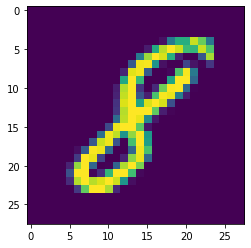

In [4]:
plt.imshow(x_train[7777])

In [5]:
# Normalize pixel values to range 0-1
# the pixel values in an image typically range from 0 to 255
# 1dividing all pixel values by 255 brings the pixel values to the range between 0 and 1
x_train = x_train / 255.0
x_test = x_test / 255.0
x_train

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [6]:
# Reshaping the array to 4-dims so that it can work with the Keras API
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)


In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Define data augmentation parameters for training set
train_datagen = ImageDataGenerator(
rotation_range=20, # Randomly rotate images up to 10 degrees
width_shift_range=0.1, # Randomly shift images horizontally up to 10% of the width
height_shift_range=0.1, # Randomly shift images vertically up to 10% of the height
horizontal_flip=True, # Randomly flip images horizontally
vertical_flip=False, # Don't randomly flip images vertically
shear_range=0.10, # crops part of the image
zoom_range=0.10 # #zooms the image by 10%
)


In [8]:
# Fit the transformation to the training dataset
train_datagen.fit(x_train)

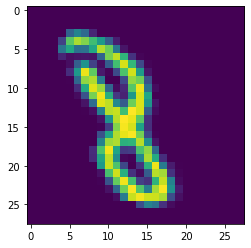

In [9]:
# showing sample of a transformation
plt.imshow(train_datagen.random_transform(x_train[7777]))

### MODELS

In [21]:
#Import neccessary libraries for the model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from keras import regularizers

#### Choice of optimizer

#### Adam

In [18]:
model = Sequential()
model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=(28,28,1),activation = 'relu',padding = 'same'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=128,kernel_size=(3,3),activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128,activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(10,activation = 'softmax'))

# print the summary of the model constructed
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 2, 2, 128)       

In [ ]:
# Compile the model
model.compile(optimizer= Adam(learning_rate =0.001), loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
history=model.fit(train_datagen.flow(x_train, keras.utils.to_categorical(y_train), batch_size=32),epochs=10, validation_data=(x_test, keras.utils.to_categorical(y_test)))

In [ ]:
pd.DataFrame(history.history).plot()

In [ ]:
y_pred = np.argmax(model.predict(x_test), axis=1)

In [ ]:
model.predict(x_test).shape

In [ ]:
# Print the classification report
print(classification_report(y_test, y_pred))

#### SGD

In [ ]:
model = Sequential()
model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=(28,28,1),activation = 'relu',padding = 'same'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=128,kernel_size=(3,3),activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128,activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(10,activation = 'softmax'))


# Print the model summary
model.summary()

In [ ]:
# Compile the model
model.compile(optimizer=SGD(learning_rate=0.001, momentum=0.9), loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
history=model.fit(train_datagen.flow(x_train, keras.utils.to_categorical(y_train), batch_size=32),epochs=10, validation_data=(x_test, keras.utils.to_categorical(y_test)))

In [ ]:
pd.DataFrame(history.history).plot()

In [ ]:
y_pred = np.argmax(model.predict(x_test), axis=1)

In [ ]:
model.predict(x_test).shape

In [ ]:
# Print the classification report
print(classification_report(y_test, y_pred))

#### RMSprop

In [ ]:
model = Sequential()
model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=(28,28,1),activation = 'relu',padding = 'same'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=128,kernel_size=(3,3),activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128,activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(10,activation = 'softmax'))


# Print the model summary
model.summary()

In [ ]:
model.compile(optimizer=RMSprop, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history=model.fit(train_datagen.flow(x_train, keras.utils.to_categorical(y_train), batch_size=32),epochs=10, validation_data=(x_test, keras.utils.to_categorical(y_test)))

In [ ]:
pd.DataFrame(history.history).plot()

In [ ]:
y_pred = np.argmax(model.predict(x_test), axis=1)

In [ ]:
model.predict(x_test).shape

In [ ]:
# Print the classification report
print(classification_report(y_test, y_pred))

##### Regularizers

##### L1

In [16]:
# Example CNN architecture with L1 regularization
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=(28,28,1), activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.001)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', kernel_regularizer=regularizers.l1(0.001)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu', kernel_regularizer=regularizers.l1(0.001)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Print the model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 2, 2, 128)       

In [ ]:
# Compile the model
model.compile(optimizer= Adam(learning_rate =0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history=model.fit(train_datagen.flow(x_train, keras.utils.to_categorical(y_train), batch_size=32),epochs=10, validation_data=(x_test, keras.utils.to_categorical(y_test)))

In [ ]:
pd.DataFrame(history.history).plot()

In [ ]:
y_pred = np.argmax(model.predict(x_test), axis=1)

In [ ]:
model.predict(x_test).shape

In [ ]:
# Print the classification report
print(classification_report(y_test, y_pred))

##### L2

In [ ]:
# Example CNN architecture with L2 regularization
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=(28,28,1), activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.001)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Print the model summary
model.summary()

In [ ]:
# Compile the model
model.compile(optimizer=Adam(learning_rate =0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history=model.fit(train_datagen.flow(x_train, keras.utils.to_categorical(y_train), batch_size=32),epochs=10, validation_data=(x_test, keras.utils.to_categorical(y_test)))

In [ ]:
pd.DataFrame(history.history).plot()

In [ ]:
y_pred = np.argmax(model.predict(x_test), axis=1)

In [ ]:
model.predict(x_test).shape

In [ ]:
# Print the classification report
print(classification_report(y_test, y_pred))

##### Batch Normalization

In [19]:
model = Sequential()
model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=(28,28,1),activation = 'relu',padding = 'same'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=128,kernel_size=(3,3),activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(128,activation = 'relu'))
model.add(Dense(10,activation = 'softmax'))

# Print the model summary
model.summary()

In [ ]:
# Compile the model
model.compile(optimizer=Adam(learning_rate =0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history=model.fit(train_datagen.flow(x_train, keras.utils.to_categorical(y_train), batch_size=32),epochs=10, validation_data=(x_test, keras.utils.to_categorical(y_test)))

In [ ]:
pd.DataFrame(history.history).plot()

In [ ]:
y_pred = np.argmax(model.predict(x_test), axis=1)

In [ ]:
model.predict(x_test).shape

In [ ]:
# Print the classification report
print(classification_report(y_test, y_pred))

### changes to the number of convolution blocks

In [ ]:
model = Sequential()
model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=(28,28,1),activation = 'relu',padding = 'same'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(128,activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(10,activation = 'softmax'))


# Print the model summary
model.summary()

In [ ]:
# Compile the model
model.compile(optimizer=Adam(learning_rate =0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history=model.fit(train_datagen.flow(x_train, keras.utils.to_categorical(y_train), batch_size=32),epochs=10, validation_data=(x_test, keras.utils.to_categorical(y_test)))

In [ ]:
pd.DataFrame(history.history).plot()

In [ ]:
y_pred = np.argmax(model.predict(x_test), axis=1)

In [ ]:
model.predict(x_test).shape

In [ ]:
# Print the classification report
print(classification_report(y_test, y_pred))

In [ ]:
model = Sequential()
model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=(28,28,1),activation = 'relu',padding = 'same'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(128,activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(10,activation = 'softmax'))


# Print the model summary
model.summary()

In [ ]:
# Compile the model
model.compile(optimizer=Adam(learning_rate =0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history=model.fit(train_datagen.flow(x_train, keras.utils.to_categorical(y_train), batch_size=32),epochs=10, validation_data=(x_test, keras.utils.to_categorical(y_test)))

In [ ]:
pd.DataFrame(history.history).plot()

In [ ]:
y_pred = np.argmax(model.predict(x_test), axis=1)

In [ ]:
model.predict(x_test).shape

In [ ]:
# Print the classification report
print(classification_report(y_test, y_pred))

#### Learning Rate

In [ ]:
model = Sequential()
model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=(28,28,1),activation = 'relu',padding = 'same'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=128,kernel_size=(3,3),activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128,activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(10,activation = 'softmax'))

# print the summary of the model constructed
model.summary()

In [ ]:
model.compile(optimizer=Adam(learning_rate =0.01), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history=model.fit(train_datagen.flow(x_train, keras.utils.to_categorical(y_train), batch_size=32),epochs=10, validation_data=(x_test, keras.utils.to_categorical(y_test)))

In [ ]:
pd.DataFrame(history.history).plot()

In [ ]:
y_pred = np.argmax(model.predict(x_test), axis=1)

In [ ]:
model.predict(x_test).shape

In [ ]:
# Print the classification report
print(classification_report(y_test, y_pred))

In [ ]:
from sklearn.model_selection import KFold
from tensorflow.keras.datasets import mnist

# Load the mnist dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Divide all pixel values by 255 to bring the pixel values to the range between 0 and 1
x_train = x_train / 255.0
x_test = x_test / 255.0

# Reshape the array to 4-dims so that it can work with the Keras API
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

# Define the K-fold Cross Validator
kfold = KFold(n_splits=5, shuffle=True)

# Loop through each fold and train a separate model
for train_index, val_index in kfold.split(x_train, y_train):
    # Split the data into training and validation sets for this fold
    x_train_fold, x_val_fold = x_train[train_index], x_train[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

    # Define the model architecture
    model = Sequential([
        Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
        Dense(10, activation='softmax')
    ])

    # Compile the model
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    # Train the model on the current fold
    model.fit(x_train_fold, to_categorical(y_train_fold), epochs=5, validation_data=(x_val_fold, to_categorical(y_val_fold)))

# Evaluate the final model on the test set
model.evaluate(x_test, to_categorical(y_test))

In [ ]:
scores = []
for train_index, val_index in kf.split(X):
  X_train, X_val = X[train_index], X[val_index]
  y_train, y_val = y[train_index], y[val_index]
  history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))
  score = model.evaluate(X_val, y_val)
  scores.append(score[1])

In [ ]:
mean_score = np.mean(scores)
std_score = np.std(scores)